In [4]:
import pandas as pd
from collections import Counter
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
df=heart_disease.data
df=heart_disease.data.features
df_1=heart_disease.data.targets
print(heart_disease.data.targets)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


In [ ]:
df.isnull()
df.isnull().sum().sum()

6

In [ ]:

df.isna().any()[lambda x: x]


,0
ca,True
thal,True


In [ ]:
df.thal.isnull().sum().sum()

2

In [ ]:
df.ca.isnull().sum().sum()


4

In [ ]:
df.trestbps.isnull().sum().sum()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
df.loc[:, 'thal'] = df['thal'].fillna(df['thal'].median())
df.loc[:, 'ca'] = df['ca'].fillna(df['ca'].median())


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
df2 = pd.concat([df, df_1], axis=1)
df2['num'].value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [ ]:
df3=df2
df3['num'].dtypes
df4=df3.num.replace(to_replace=[1, 2,3,4],
           value=1)

df1 = pd.concat([df3, df4], axis=1)
df = df2.rename(columns={'num': 'num', 'num': 'target'})
df1.columns
# df3['num'].value_counts()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'num'],
      dtype='object')

In [ ]:
col_counts = Counter()
new_columns = []
for col in df.columns:
    col_counts[col] += 1
    new_columns.append(f"{col}_{col_counts[col]}" if col_counts[col] > 1 else col)

df.columns = new_columns  # Assign new column names
# df['target_2'].value_counts()
# df1 = df.drop([ 'target',  'target_3','target_4','target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
#        'target_11', 'target_12', 'target_13', 'target_14', 'target_15',
#        'target_16'], axis=1)

df1.rename(columns={'target_2': 'target'}, inplace=True)
df1.columns
df1.to_csv("my_data.csv", index=False)

from google.colab import files
files.download("my_data.csv")  # Triggers download
df1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

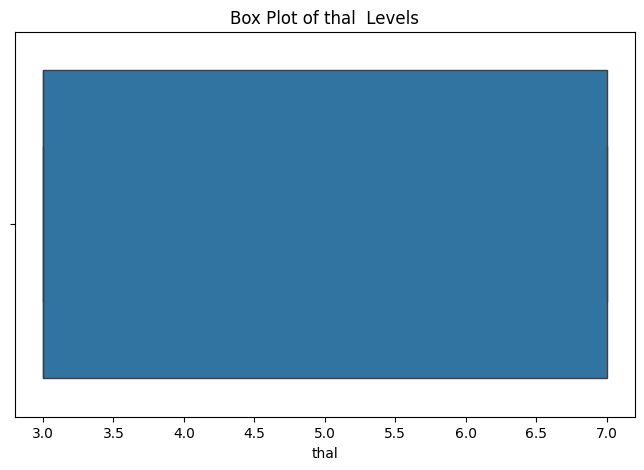

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(8, 5))
# sns.boxplot(x=df["trestbps"])
sns.boxplot(x=df["thal"])

plt.title("Box Plot of thal  Levels")
plt.show()



In [13]:
from sklearn.ensemble import IsolationForest
s
iso = IsolationForest(contamination=0.05, random_state=42)  # 5% contamination
outliers = iso.fit_predict(df[["trestbps"]])

df["outlier"] = outliers  # -1 means outlier
print(df[df["outlier"] == -1])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
14    52    1   3       172   199    1        0      162      0      0.5   
80    45    1   4       104   208    0        2      148      1      3.0   
83    68    1   3       180   274    1        2      150      1      1.6   
126   56    0   4       200   288    1        2      133      1      4.0   
131   51    1   3        94   227    0        0      154      1      0.0   
146   57    1   4       165   289    1        2      124      0      1.0   
160   46    1   2       101   197    1        0      156      0      0.0   
172   59    0   4       174   249    0        0      143      1      0.0   
183   59    1   1       178   270    0        2      145      0      4.2   
188   54    1   2       192   283    0        2      195      0      0.0   
201   64    0   4       180   325    0        0      154      1      0.0   
213   66    0   4       178   228    1        0      165      1      1.0   
222   39    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

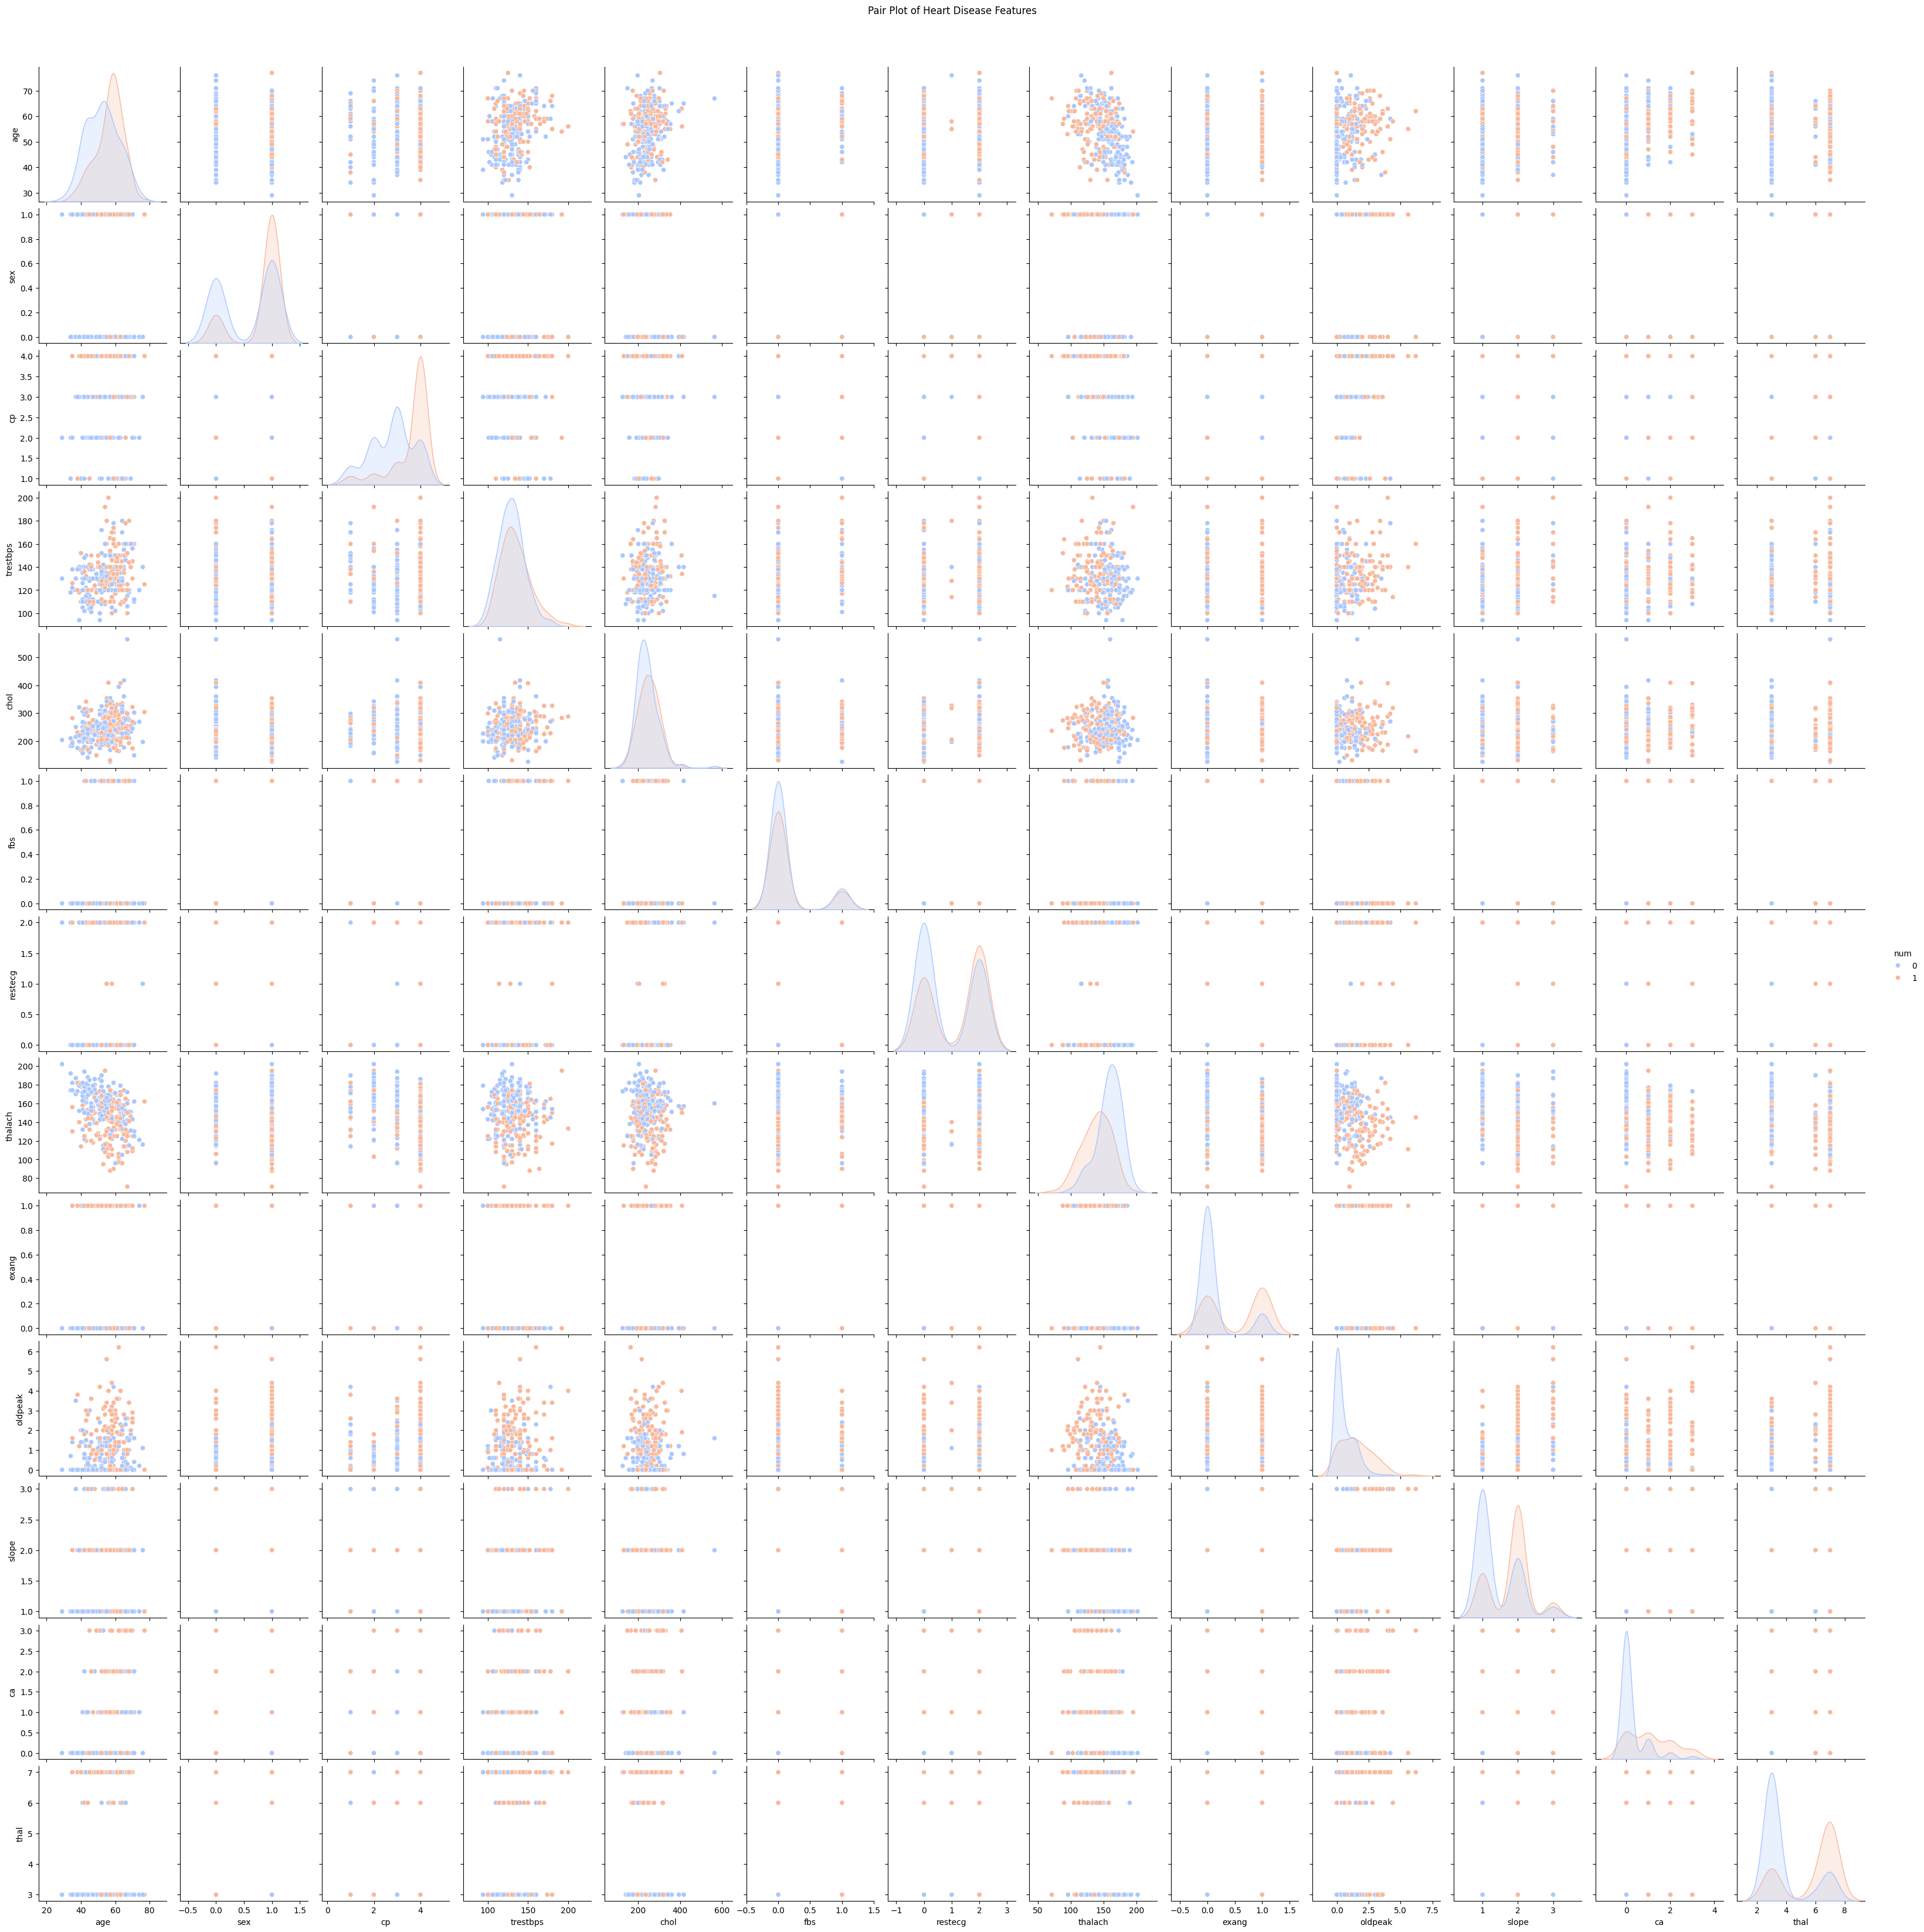

In [ ]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','num']  # Add or remove columns as needed

# Create a pair plot to explore relationships between features
sns_plot=sns.pairplot(df[features], hue="num", palette="coolwarm", diag_kind="kde")

# Show the plot
plt.suptitle("Pair Plot of Heart Disease Features", y=1.02)  # Title with some spacing
plt.savefig("high_quality_plot.png", dpi=300, bbox_inches="tight")


files.download("high_quality_plot.png")  # Change filename if needed
plt.show()

In [ ]:
df1['target'].value_counts()
dbscan = DBSCAN(eps=3, min_samples=5)  # Adjust parameters as needed
outlier_preds = dbscan.fit_predict(df)

df_cleaned = df[outlier_preds != -1]  # Remove outliers (-1 are outliers)